### Energy of Springs 

$$ |\vec{F_{s}}| = k|\Delta \vec{l}| $$

This notebook is intended to walk you through how to model Hooke's Law problem for a block on a horitzontal spring on a frictionless table

You will notice that I did not set up any vector notation in this notebook for you. This is due to the 1D nature of the motion. If you wanted to explore a spring moving in 2D or 3D space, you would need to modify to incorporate vectors of position, velocity, acceleration, and force. 

The code below has all of the initial conditions set for you. Your first task is to complete the while loop code. Feel free to change the variable names to your liking. 

If you are succesful, the graph you produce should [look like this](https://drive.google.com/file/d/1-6OYK7OV_49odj4g2mokZjVw-Ri9lAw3/view?usp=sharing). 


In [1]:
#import stuff 
import matplotlib.pyplot as plt
import numpy as np

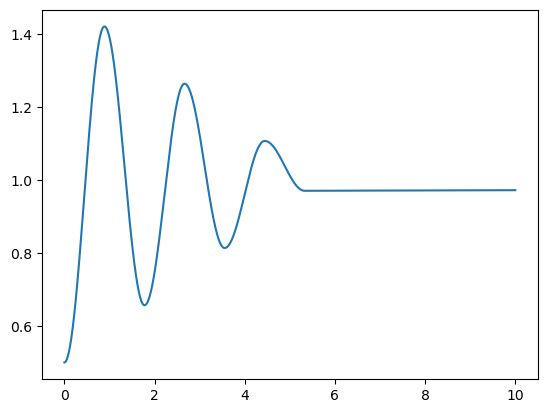

In [2]:
# Define the object parameters
m = 2 #kg mass of block on horizontal surface 
k = 25 #N/m spring constant 
L = 1 #m unstretched length of spring 
mu = 0.05 # unitless coefficient of kinetic friction, because it is a ratio 
g = 9.81 #m/s/s, acceleration due to gravity 

# Define simulation parameters
x = 0.5 #m initial position of the block 
v = 0 #m/s initial velocity of the block
t = 0 #s initial time
dt = 0.001 #s simulation time step; a larger one will warrant more error 
sim_length = 10 #s simulation length 

# Define Energy 
Ke = 0.5 * m * v**2 #J, if using vectors, use the magnitude 
Us = 0.5 * k * (x - L)**2 # J, finding displacement of stretched spring 
E = Ke + Us 

# Initialize lists for graphing later
x_list=[x] #m
v_list=[v] #m/s
t_list=[t] #s
Ke_list=[Ke] #J 
Us_list=[Us] #J
E_list = [E] #J 

# Use a while loop to iterate until the time limit is reached 
while t < sim_length: #this simulation will run for the length of time set by sim_length
    # Creating unit vectors 
    vmag = np.linalg.norm(v) # Magnitude of the velocity 

    # Conditional statement for the friction;
    if vmag == 0: 
        F_friction = 0 #N, no frictional force when the object is not moving! 
    else: 
        vhat = v / vmag # Preserves the 1D direction of this 'vector' 
        F_friction = mu * m * g * (-vhat) #N, force of kinetic friction; opposite direction of velocity 
    
    F_spring = -k * (x - L) #N, Hooke's law will create a positive force 
    F_net = F_spring + F_friction # The only force is this simplified model is the force of the spring 
    a = F_net / m  # Here, we calculate the nonconstant acceleration 
    v = v + a * dt # Here, we calculate the velocity in small steps, with the acceleration 
    x = x + v * dt # Similar iterative method to calculate displacement 
    t = t + dt # Taking small steps of time 

    # Also update all energy values 
    Ke = 0.5 * m * v**2 #J, if using vectors, use the magnitude 
    Us = 0.5 * k * (x - L)**2 # J, finding displacement of stretched spring 
    E = Ke + Us 
    
    # Append all lists 
    x_list.append(x) #m
    v_list.append(v) #m/s
    t_list.append(t) #s
    Ke_list.append(Ke) #J 
    Us_list.append(Us) #J
    E_list.append(E) #J 

# Graph position versus time 
plt.plot(t_list, x_list)

Text(0, 0.5, 'Energy (J)')

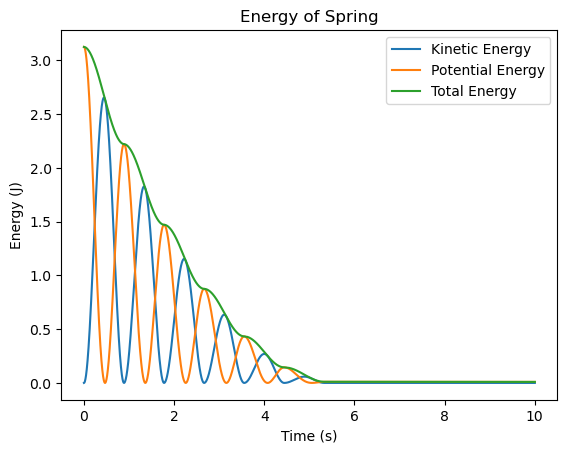

In [3]:
# Graphs 
plt.plot(t_list, Ke_list, label = "Kinetic Energy") 
plt.plot(t_list, Us_list, label = "Potential Energy")
plt.plot(t_list, E_list, label = "Total Energy")
plt.legend()
plt.title("Energy of Spring")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")

## Playing with the variables

Copy your working code into the code cell below. Walk through the series of questions below, modifying your code cell below. This keeps the above graphs available for you to compare. 

1. For the original code, did you pull the block to the right, to the left, or leave it in place? How do you know?

**Answer:** You have to look at the x and L values to determine that, because the velocity magnitude is squared so we have no idea as to its direction. 

2. Change the starting position of the block to see each of these scenarios and how they compare to the original.

3. What is interesting about your graph if you start the block at the same position as the spring length? Why do you think that is?

**Answer:** All the energy is at zero, because there is no net force acting on the system. 

4. Reset the starting position to 0.5 m

5. Change the mass of the block. What changes in the graph when you make it larger? smaller?

**Answer:** The mass causes a smaller acceleration (F/m). Effectively, the velocity (which is squared) is then smaller, leading to a smaller frequency. However, since as the potential energy is unchanged, the total energy remains unchanged, just less oscillations in the same time period. Although the mass is larger, since the velocity is squared, the smaller value is 'amplified', so to say. 

6. Reset the mass to 2 kg.
   
7. Change the spring constant of the spring. What changes in the graph when you make it larger? smaller?

**Answer:** The spring constant also affects the frequency. This is because it also affects the force, which in turn affects the acceleration. It is in the numerator of the acceleration, so a larger spring constant means a stiffer and harder to stretch spring. This means although we are pulling it the same 0.5 position, a greater force is required on our part AND from the spring itself. Therefore, a greater force will be exerted by the spring once released, which is why it is faster. A smaller, looser spring would mean a lesser force is exerted back by the spring since we didn't have to use much spring to pull it to 0.5 at first. It's almost like a higher spring constant is tighter wound. 

A larger constant also introduces more energy into the system through the potential energy equation. Even at its maximum position, the k increases the Us, so the total energy throughout will increase too. 

8. Reset the spring constant back to 25 N. 
    
9. Change the unstretched length of the spring. What changes in the graph when you make it larger? smaller?

**Answer:** This affects the amplitude of the graph, since this controls the delta l that the spring will oscillate back and forth between. 

10. Reset the unstretched length back to 1. 
    
11. At this point you can play with the other simulation parameters if you wish, or move on to the next activity
